In [1]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "cats-and-dogs.zip"

--2019-10-11 17:08:45--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving download.microsoft.com (download.microsoft.com)... 104.84.156.142, 2600:1417:5e:68b::e59, 2600:1417:5e:6af::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|104.84.156.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘cats-and-dogs.zip’

cats-and-dogs.zip   100%[===================>] 786.68M  1.95MB/s    in 6m 40s  

2019-10-11 17:15:26 (1.96 MB/s) - ‘cats-and-dogs.zip’ saved [824894548/824894548]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('cats-and-dogs.zip','r')
zip_ref.extractall('cats-and-dogs')
zip_ref.close()

In [3]:
cat_src_dir = 'cats-and-dogs/PetImages/Cat'
cat_train_dir = 'dataset/train/cats'
cat_val_dir = 'dataset/test/cats'

dog_src_dir = 'cats-and-dogs/PetImages/Dog'
dog_train_dir = 'dataset/train/dogs'
dog_val_dir = 'dataset/test/dogs'

train_dir = 'dataset/train'
val_dir = 'dataset/test'

In [4]:
import os
import numpy as np
import shutil
from skimage import io

In [5]:
def remove_corrupted_image(source_dir): ##Remove corrupted Image from Source File
    src_fnames = os.listdir(source_dir)
    newlist = []
    for names in src_fnames:
        if names.endswith(".jpg"):
            newlist.append(names)
    src_fnames = np.asarray(newlist,dtype='S256')
    total_image = len(src_fnames)
    src_dir = np.empty(len(src_fnames),dtype = 'S256')
    src_dir[::] = source_dir + '/'
    src_dir = np.char.add(src_dir,src_fnames)
    for i in range(len(src_dir)):
        dir = str(src_dir[i])
        dir = dir[2:-1]
        try:
            img = io.imread(dir)
        except:
            os.remove(dir)
            print('Deleted file directory',dir)
remove_corrupted_image(dog_src_dir)  ##remove_corrupted_image(cat image directoru)
remove_corrupted_image(cat_src_dir)  ##remove_corrupted_image(dog image directory)

Deleted file directory cats-and-dogs/PetImages/Dog/11702.jpg


/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corr

Deleted file directory cats-and-dogs/PetImages/Cat/10404.jpg
Deleted file directory cats-and-dogs/PetImages/Cat/666.jpg


In [6]:
try:
    os.makedirs(cat_train_dir)
    os.makedirs(cat_val_dir)
    os.makedirs(dog_train_dir)
    os.makedirs(dog_val_dir)
except FileExistsError:
    print('already exists')

def split_data(source_dir,trn_dir,val_dir):  ##source directory,train directory,validation directory
    src_fnames = os.listdir(source_dir)
    newlist = []
    for names in src_fnames:
        if names.endswith(".jpg"):
            newlist.append(names)
    src_fnames = np.asarray(newlist,dtype='S256')
    total_image = len(src_fnames)
    
    src_dir = np.empty(len(src_fnames),dtype = 'S256')
    src_dir[::] = source_dir + '/'
    src_dir = np.char.add(src_dir,src_fnames)
    
    dst_dir = np.empty(len(src_fnames),dtype = 'S256')
    dst_dir[:int(.9*total_image)] = trn_dir + '/'
    dst_dir[int(.9*total_image):] = val_dir + '/'
    dst_dir = np.char.add(dst_dir,src_fnames)

    print(len(src_dir),len(dst_dir))
    for i in range(len(src_fnames)):
        src = str(src_dir[i])
        src = src[2:-1]
        dst = str(dst_dir[i])
        dst = dst[2:-1]
        shutil.copyfile(src,dst)
        
split_data(cat_src_dir,cat_train_dir,cat_val_dir)  ##split_data(cat source directory,cat train directory,cat validation directory)
split_data(dog_src_dir,dog_train_dir,dog_val_dir)  ##split_data(dog source directory,dog train directory,dog validation directory)

already exists
12498 12498
12499 12499


In [7]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (300,300,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

model.summary()

/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001),loss = 'binary_crossentropy',metrics = ['acc'])

W1011 17:18:16.467804 140447285765760 deprecation.py:323] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.)
validation_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 50,
    class_mode = 'binary',
    target_size = (300,300)
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    batch_size = 10,
    class_mode = 'binary',
    target_size = (300,300)
)

Found 22497 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
#    steps_per_epoch = 100,
    epochs = 15,
#    validation_steps = 50,
    verbose = 1
)
model.save('cat_vs_dog.model')##save the trained model

Epoch 1/15
414/450 [==========================>...] - ETA: 5s - loss: 0.6317 - acc: 0.6428

/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/home/emroze/virtual/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corr

450/450 [==============================] - 81s 180ms/step - loss: 0.6265 - acc: 0.6475 - val_loss: 0.5282 - val_acc: 0.7288
Epoch 2/15
450/450 [==============================] - 77s 171ms/step - loss: 0.4981 - acc: 0.7612 - val_loss: 0.4356 - val_acc: 0.8080
Epoch 3/15
450/450 [==============================] - 77s 172ms/step - loss: 0.4067 - acc: 0.8140 - val_loss: 0.3643 - val_acc: 0.8504
Epoch 4/15
450/450 [==============================] - 77s 172ms/step - loss: 0.3398 - acc: 0.8518 - val_loss: 0.3364 - val_acc: 0.8584
Epoch 5/15
450/450 [==============================] - 78s 173ms/step - loss: 0.2814 - acc: 0.8827 - val_loss: 0.3449 - val_acc: 0.8656
Epoch 6/15
450/450 [==============================] - 77s 172ms/step - loss: 0.2389 - acc: 0.9030 - val_loss: 0.3037 - val_acc: 0.8736
Epoch 7/15
450/450 [==============================] - 78s 173ms/step - loss: 0.1991 - acc: 0.9195 - val_loss: 0.3053 - val_acc: 0.8764
Epoch 8/15
450/450 [==============================] - 77s 170ms/st

In [11]:
###Training time will vary depending on your hardware.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tensorflow as tf

In [13]:
new_model = tf.keras.models.load_model('cat_vs_dog.model') ##Reload the saved model.

##I am using 20 image for testing.

test_fnames = os.listdir('.')
newlist = []
for names in test_fnames:
    if names.endswith(".jpg"):
        newlist.append(names)
test_fnames = np.asarray(newlist,dtype='S256')


def predict(img_dir):
    image = cv2.imread(img_dir)
    image = cv2.resize(image,(300,300))
    new_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_img = np.expand_dims(new_img, axis=0)
    classes = new_model.predict(new_img,batch_size=20)
    print(classes[0])
    if classes[0]>0.5:
        x = "Dog"
        #print(x)
    else:
        x = "Cat"
        #print(x)
    image = cv2.putText(image, x, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 6, cv2.LINE_AA)    
    cv2.imshow(x, image)
    cv2.waitKey(500)
    time.sleep(2)
    cv2.destroyAllWindows()

for i in range(len(test_fnames)):
    dir = str(test_fnames[i])
    dir = dir[2:-1]
    predict(dir)

W1011 17:41:55.802547 140447285765760 deprecation.py:506] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1011 17:41:55.804121 140447285765760 deprecation.py:506] From /usr/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[0.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]
[0.]
[0.]
[0.]


Text(0.5, 1.0, 'Training and validation loss')

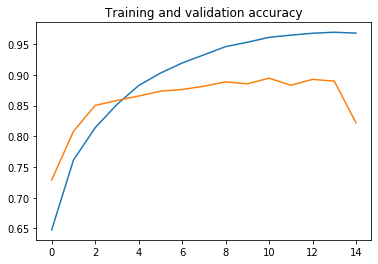

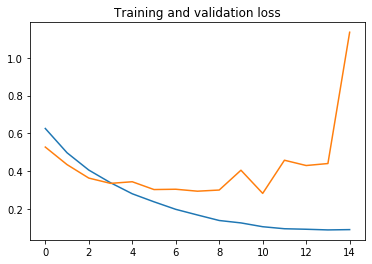

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )